[ellamoses.github.io](https://ellamoses.github.io)

Ella Moses and Kailen Mitchell

Project Title: NFL Injuries

# Project Description

Our project works with a dataset titled "NFL 1st and Future - Analytics" which contains two files, Injury Record and Play List. The Injury Record file provides information about each injury including the player it happened to, the play and game it happened during, the surface it happened on, and the days missed due to injury. The Play List provides a list of each player’s plays during different games and other helpful information like the play type, temperature, stadium type, weather, and player’s position.

Link to the source of our data: https://www.kaggle.com/competitions/nfl-playing-surface-analytics/overview



# Project Goals

Our goal is to use these two data sets to analyze the relationship between injuries in the NFL and other factors including the surface type of the field, the weather, player position, and play type. We will focus on predicting the body part that is injured and the days missed due to injury. Because football is an injury-prone sport, we would like to see if we can predict what types of injuries will occur so precautions can be taken to reduce the risk and severity.

Collaboration Plan

a) How are we working together?
- We are working together by meeting up to work simultaneously on the project so that we can communicate effectively and divide tasks evenly. We will plan so that each of us will create an equal amount of visualizations and conclusions from the data so that both of us come away with a strong understanding of our data and how we found our results. It’s important to us that we are both working closely with the data as well as writing up results.

b) What technologies are we using?
- We are using Google Collab/Jupiter Notebooks to parse the datasets and generate visualizations/results. At this time, we aren’t planning on using any other tools.


c) When / how often are we planning to meet?
-  We have very similar schedules and are in a lot of classes together so it’ll be very easy for us to find times to meet. Whenever we have a milestone coming up, we’ll probably meet 2-3 times per week during our break in between classes or after class if needed as well.


# Discussion:

Can we use player position, weather, play type, and surface to predict the type and severity of an injury?
Our data is useful because we can link the injuries to the plays and conditions the injury happened under.



# Data Processing


We will begin by loading in our data and creating two dataframes to store the plays and injuries.

In [1]:
# clone the project repository, change to right directory, and import libraries.
%cd /content
!git clone https://github.com/EllaMoses/EllaMoses.github.io.git
%cd /content/EllaMoses.github.io/data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/content
Cloning into 'EllaMoses.github.io'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 54 (delta 19), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (54/54), 2.06 MiB | 2.51 MiB/s, done.
Resolving deltas: 100% (19/19), done.
/content/EllaMoses.github.io/data


In [2]:
#Read in Play List file
plays = pd.read_csv("PlayList.csv")
plays

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267000,47888,47888-13,47888-13-51,Cornerback,99,13,Outdoor,Synthetic,33,Sunny and cold,Pass,51,DB,DB
267001,47888,47888-13,47888-13-52,Cornerback,99,13,Outdoor,Synthetic,33,Sunny and cold,Pass,52,DB,DB
267002,47888,47888-13,47888-13-53,Cornerback,99,13,Outdoor,Synthetic,33,Sunny and cold,Pass,53,DB,DB
267003,47888,47888-13,47888-13-54,Cornerback,99,13,Outdoor,Synthetic,33,Sunny and cold,Pass,54,DB,DB


In [3]:
# data types of variables in plays dataframe
plays.dtypes

PlayerKey          int64
GameID            object
PlayKey           object
RosterPosition    object
PlayerDay          int64
PlayerGame         int64
StadiumType       object
FieldType         object
Temperature        int64
Weather           object
PlayType          object
PlayerGamePlay     int64
Position          object
PositionGroup     object
dtype: object

In [4]:
# summary statistics for plays dataframe
plays.describe()

,PlayerKey,PlayerDay,PlayerGame,Temperature,PlayerGamePlay
count,267005.000000,267005.000000,267005.000000,267005.000000,267005.000000
mean,41515.381465,210.451351,13.799131,-35.029535,29.058647
std,4125.858924,183.643654,8.342894,304.583110,19.626551
min,26624.000000,-62.000000,1.000000,-999.000000,1.000000
25%,39653.000000,43.000000,7.000000,44.000000,13.000000
50%,42432.000000,102.000000,13.000000,61.000000,26.000000
75%,44480.000000,400.000000,20.000000,72.000000,43.000000
max,47888.000000,480.000000,32.000000,97.000000,102.000000


In [5]:
#Read in injury file
injury = pd.read_csv("InjuryRecord.csv")
injury

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1
...,...,...,...,...,...,...,...,...,...
100,44423,44423-13,NaN,Knee,Synthetic,1,0,0,0
101,31933,31933-20,NaN,Knee,Synthetic,1,0,0,0
102,47285,47285-4,NaN,Knee,Natural,1,1,0,0
103,37068,37068-19,NaN,Knee,Natural,1,1,0,0


In [6]:
# data types of variables in injury dataframe
injury.dtypes

PlayerKey     int64
GameID       object
PlayKey      object
BodyPart     object
Surface      object
DM_M1         int64
DM_M7         int64
DM_M28        int64
DM_M42        int64
dtype: object

In [7]:
# summary statistics for injury data frame
injury.describe()

,PlayerKey,DM_M1,DM_M7,DM_M28,DM_M42
count,105.000000,105.0,105.000000,105.000000,105.000000
mean,42283.609524,1.0,0.723810,0.352381,0.276190
std,4163.510366,0.0,0.449257,0.480003,0.449257
min,31070.000000,1.0,0.000000,0.000000,0.000000
25%,39656.000000,1.0,0.000000,0.000000,0.000000
50%,43518.000000,1.0,1.000000,0.000000,0.000000
75%,45966.000000,1.0,1.000000,1.000000,1.000000
max,47813.000000,1.0,1.000000,1.000000,1.000000


We will now combine the two dataframes by performing a merge to add all relevent information from plays data frame to the injury data frame. We will then replace our missing values with NaN and clean our weather column values. The four DM_M variables are dummy variables used to encode whether or not a player missed, 1, 7, 28, or 42 days. We will create a new column to store the days missed so we are able to work with the actual number of days in addition to the provided binary variables.

In [8]:
#Combine the two dataframes by performing a right merge to add all relevent info from plays data frame to the injury data frame

injury_plays = injury.merge(plays, on=["PlayerKey", "GameID", "PlayKey"], how="left")

#we can use .replace to fix all -999 values with NaN
injury_plays['Temperature'] = injury_plays['Temperature'].replace(-999,np.nan)

# map weather conditions to account for typos and other name variations
weathermapped = injury_plays['Weather'].map({
  "Clear": "Clear",
  "Clear Skies": "Clear",
  "Clear and warm":"Clear",
  "Clear skies":"Clear",
  "Cloudy":"Cloudy",
  "Cloudy and Cool":"Cloudy",
  "Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.":"Rain",
  "Cloudy, 50% chnace of rain":"Rain",
  "Cold":"NaN",
  "Controlled Climate":"Indoor",
  "Coudy":"Cloudy",
  "Fair":"Partly Cloudy",
  "Indoor":"Indoor",
  "Indoors":"Indoor",
  "Light Rain":"Rain",
  "Mostly Sunny":"Partly Cloudy",
  "Mostly cloudy":"Partly Cloudy",
  "Mostly sunny":"Partly Cloudy",
  "Partly Cloudy":"Partly Cloudy",
  "Rain":"Rain",
  "Rain shower":"Rain",
  "Sun & clouds":"Partly Cloudy",
  "Sunny":"Clear",
})
injury_plays['Weather'] = weathermapped

# Create a new variable to store the number of days missed
def num_days_missed(row):
    for i in [42, 28, 7, 1]:
        if row[f'DM_M{i}'] == 1:
            return i
    return 0

# Apply the function to each row to get the total days missed
injury_plays['total_days_missed'] = injury_plays.apply(num_days_missed, axis=1)

injury_plays

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,RosterPosition,...,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup,total_days_missed
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1,Linebacker,...,4.0,Indoors,Synthetic,84.0,Cloudy,Punt,32.0,OLB,LB,42
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0,Linebacker,...,7.0,Open,Natural,76.0,Partly Cloudy,Punt,26.0,OLB,LB,7
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1,Safety,...,1.0,Outdoor,Synthetic,63.0,Clear,Pass,70.0,SS,DB,42
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0,Linebacker,...,3.0,Outdoor,Natural,80.0,Cloudy,Punt,30.0,LB,LB,1
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1,Wide Receiver,...,5.0,Retractable Roof,Synthetic,89.0,Partly Cloudy,Kickoff,69.0,WR,WR,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,44423,44423-13,NaN,Knee,Synthetic,1,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
101,31933,31933-20,NaN,Knee,Synthetic,1,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
102,47285,47285-4,NaN,Knee,Natural,1,1,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
103,37068,37068-19,NaN,Knee,Natural,1,1,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7


# Exploratory Analysis & Data Visualization


We will now create tables and visualziations of our data to analyze the relationships between our variables. We will focus on the frequencies of types and severities of injuries based on Weather, Surface Type, Play Type, and position.

<Axes: xlabel='BodyPart'>

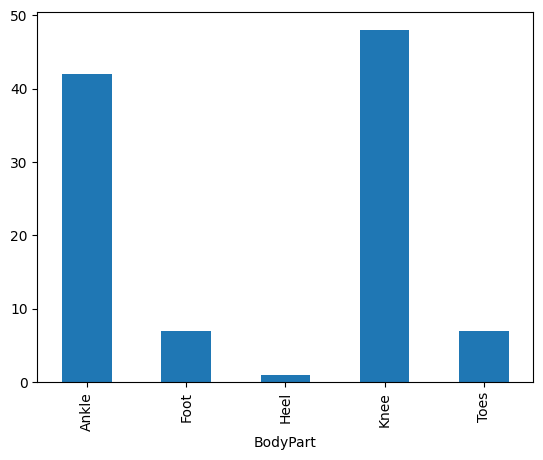

In [ ]:
bodypartgroup = injury.groupby('BodyPart').count()
bodypartgroup['PlayerKey'].plot.bar()

The most common injuries are knee and ankle injuries.

<Axes: xlabel='total_days_missed'>

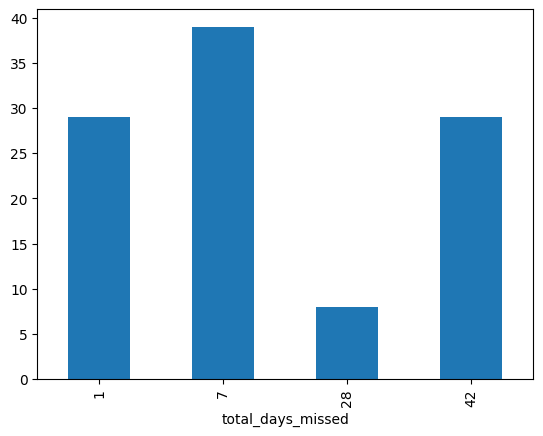

In [ ]:
injury_plays['total_days_missed'].value_counts().sort_index().plot.bar()

It is most common for a player to miss seven days due to injury.

In [ ]:
pd.crosstab(index=injury_plays["total_days_missed"],
                        columns=injury_plays["BodyPart"],normalize=True)

BodyPart,Ankle,Foot,Heel,Knee,Toes
total_days_missed,,,,,
1,0.152381,0.000000,0.000000,0.104762,0.019048
7,0.123810,0.000000,0.009524,0.200000,0.038095
28,0.019048,0.019048,0.000000,0.028571,0.009524
42,0.104762,0.047619,0.000000,0.123810,0.000000


Above table shows the frequency of days missed based on body part injured.

<Axes: xlabel='BodyPart', ylabel='total_days_missed'>

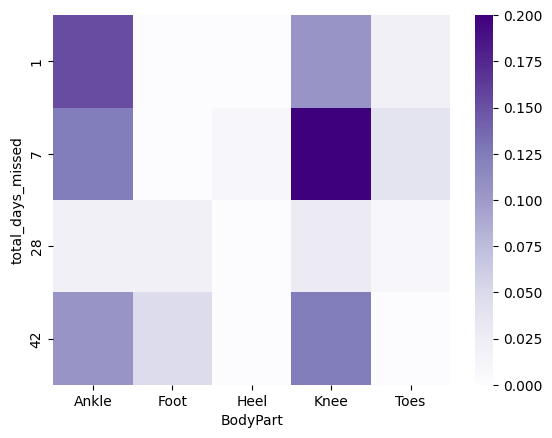

In [ ]:
sns.heatmap( pd.crosstab(injury_plays['total_days_missed'], injury_plays['BodyPart'], normalize=True), cmap='Purples')

This visualization shows the frequency of total days missed based on the type of injury.

In [ ]:
pd.crosstab(index=injury_plays["Weather"],
                        columns=injury_plays["BodyPart"])

BodyPart,Ankle,Foot,Knee
Weather,,,
Clear,13,0,9
Cloudy,6,2,7
Indoor,4,0,5
NaN,1,1,1
Partly Cloudy,8,1,7
Rain,2,0,5


Above table shows the frequency of injury type of injury based on weather.

<Axes: xlabel='Weather', ylabel='BodyPart'>

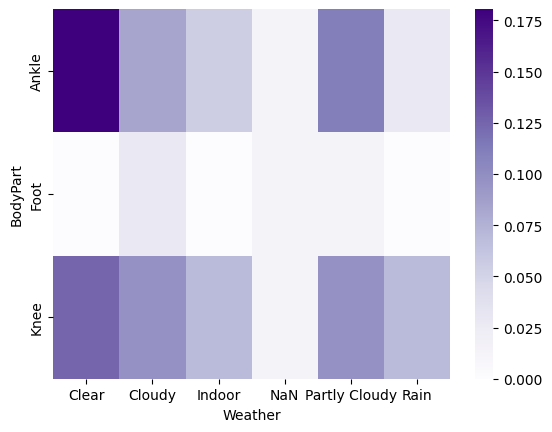

In [ ]:
sns.heatmap( pd.crosstab(injury_plays['BodyPart'], injury_plays['Weather'], normalize=True), cmap='Purples')

This visualization shows the frequency of different types of injuries based on the weather.

In [ ]:
pd.crosstab(index=injury_plays["Weather"],
                        columns=injury_plays["total_days_missed"])

total_days_missed,1,7,28,42
Weather,,,,
Clear,4,8,0,10
Cloudy,3,6,1,5
Indoor,3,4,0,2
NaN,1,1,0,1
Partly Cloudy,3,4,5,4
Rain,2,4,0,1


Above table shows the frequency of days missed based on weather.

<Axes: xlabel='Weather', ylabel='total_days_missed'>

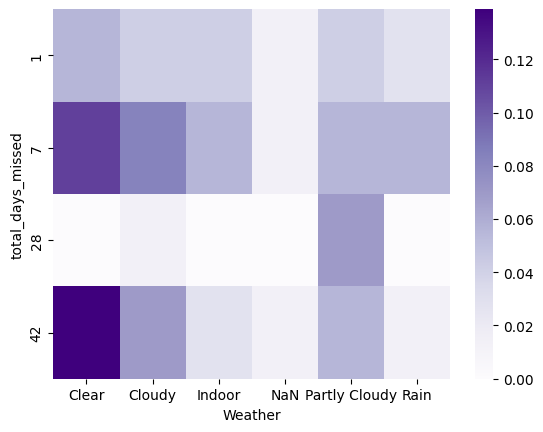

In [ ]:
sns.heatmap( pd.crosstab(injury_plays['total_days_missed'], injury_plays['Weather'], normalize=True), cmap='Purples')

This visualization shows the frequency of days missed based on the weather.

In [ ]:
pd.crosstab(index=injury_plays["Surface"],
                        columns=injury_plays["BodyPart"],normalize=True)

BodyPart,Ankle,Foot,Heel,Knee,Toes
Surface,,,,,
Natural,0.161905,0.047619,0.009524,0.228571,0.009524
Synthetic,0.238095,0.019048,0.000000,0.228571,0.057143


Above table shows the frequency of injury type based on surface type.

<Axes: xlabel='Surface', ylabel='BodyPart'>

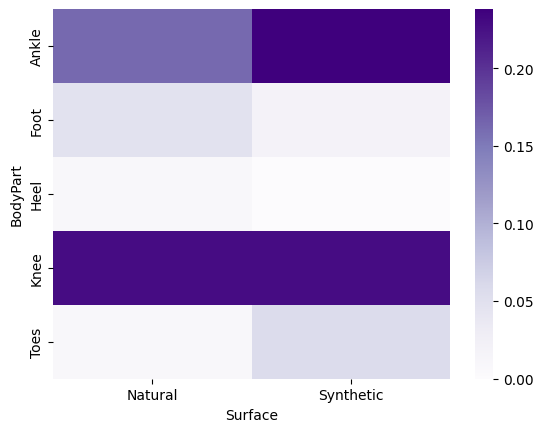

In [ ]:
sns.heatmap( pd.crosstab(injury_plays['BodyPart'], injury_plays['Surface'],normalize=True), cmap='Purples')

The heatmap above shows the frequency of injury for each body part based on the suface. Knee injuries are the most frequent and the number does not appear to be affected by surface type.

In [ ]:
pd.crosstab(index=injury_plays["Surface"],
                        columns=injury_plays["total_days_missed"])

total_days_missed,1,7,28,42
Surface,,,,
Natural,13,20,2,13
Synthetic,16,19,6,16


Above table shows the frequency of days missed based on surface.

<Axes: xlabel='Surface', ylabel='total_days_missed'>

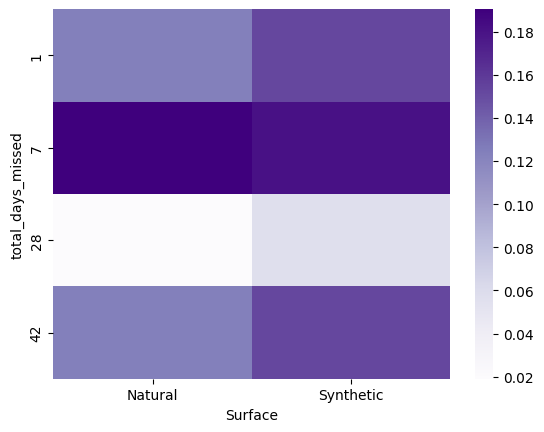

In [ ]:
sns.heatmap( pd.crosstab(injury_plays['total_days_missed'], injury_plays['Surface'], normalize=True), cmap='Purples')

This visualization shows the frequency of days missed based on the surface.

In [ ]:
pd.crosstab(index=injury_plays["PlayType"],
                        columns=injury_plays["BodyPart"], normalize=True)

BodyPart,Ankle,Foot,Knee
PlayType,,,
Kickoff,0.012987,0.012987,0.064935
Kickoff Not Returned,0.000000,0.000000,0.012987
Kickoff Returned,0.000000,0.000000,0.012987
Pass,0.194805,0.038961,0.181818
Punt,0.038961,0.000000,0.077922
Punt Not Returned,0.000000,0.012987,0.000000
Punt Returned,0.025974,0.000000,0.012987
Rush,0.181818,0.012987,0.103896


Above table shows the frequency of injury type based on play type.

<Axes: xlabel='PlayType', ylabel='BodyPart'>

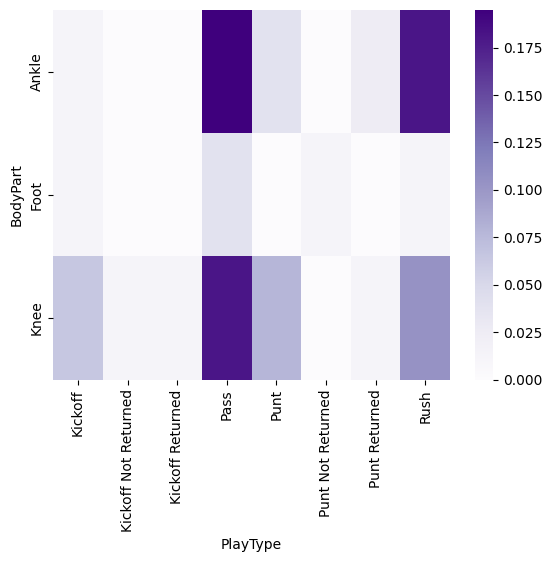

In [ ]:
sns.heatmap( pd.crosstab(injury_plays['BodyPart'], injury_plays['PlayType'], normalize=True), cmap='Purples')

This visualization shows the frequency of different types of injuries based on the play type.

In [ ]:
pd.crosstab(index=injury_plays["PlayType"],
                        columns=injury_plays["total_days_missed"])

total_days_missed,1,7,28,42
PlayType,,,,
Kickoff,1,2,0,4
Kickoff Not Returned,0,1,0,0
Kickoff Returned,0,1,0,0
Pass,7,13,3,9
Punt,2,4,0,3
Punt Not Returned,0,0,1,0
Punt Returned,0,2,0,1
Rush,7,6,3,7


Above table shows the frequency of days missed based on play type.

<Axes: xlabel='PlayType', ylabel='total_days_missed'>

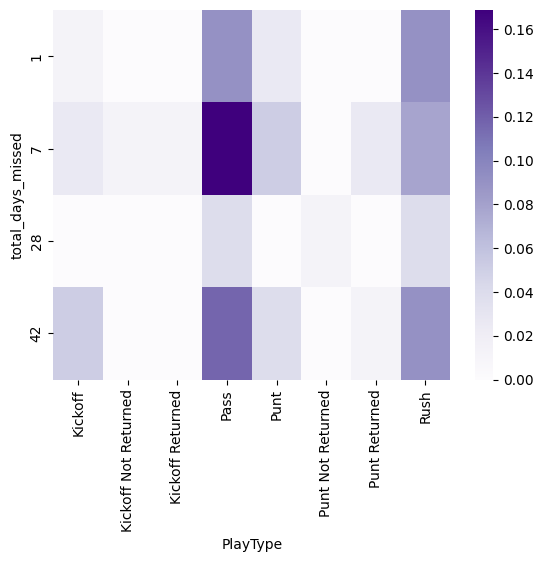

In [ ]:
sns.heatmap( pd.crosstab(injury_plays['total_days_missed'], injury_plays['PlayType'], normalize=True), cmap='Purples')

This visualization shows the frequency of days missed based on the play type.

In [ ]:
pd.crosstab(index=injury_plays["Position"],
                        columns=injury_plays["BodyPart"],normalize=True)

BodyPart,Ankle,Foot,Knee
Position,,,
C,0.038961,0.012987,0.000000
CB,0.064935,0.012987,0.025974
DB,0.000000,0.000000,0.012987
DE,0.025974,0.012987,0.025974
DT,0.000000,0.000000,0.025974
FS,0.038961,0.000000,0.025974
ILB,0.012987,0.000000,0.025974
LB,0.025974,0.000000,0.000000
MLB,0.038961,0.000000,0.012987


Above table shows the frequency of injury type based on position.

<Axes: xlabel='Position', ylabel='BodyPart'>

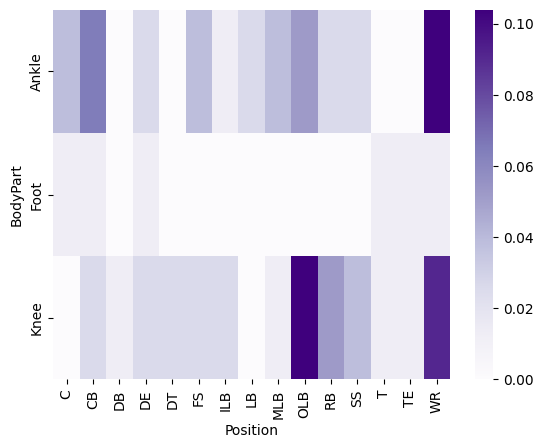

In [ ]:
sns.heatmap( pd.crosstab(injury_plays['BodyPart'], injury_plays['Position'],normalize=True), cmap='Purples')

This visualization shows the frequency of different types of injuries based on the Position. We can see that WR tend to have the most injuries. Ankle injuries appear to be the most common.

In [ ]:
pd.crosstab(index=injury_plays["Position"],
                        columns=injury_plays["total_days_missed"],normalize=True)

total_days_missed,1,7,28,42
Position,,,,
C,0.025974,0.012987,0.000000,0.012987
CB,0.012987,0.051948,0.025974,0.012987
DB,0.000000,0.012987,0.000000,0.000000
DE,0.000000,0.038961,0.000000,0.025974
DT,0.000000,0.012987,0.000000,0.012987
FS,0.012987,0.038961,0.012987,0.000000
ILB,0.012987,0.012987,0.000000,0.012987
LB,0.025974,0.000000,0.000000,0.000000
MLB,0.012987,0.012987,0.012987,0.012987


Frequencies of total days missed based on position.

<Axes: xlabel='Position', ylabel='total_days_missed'>

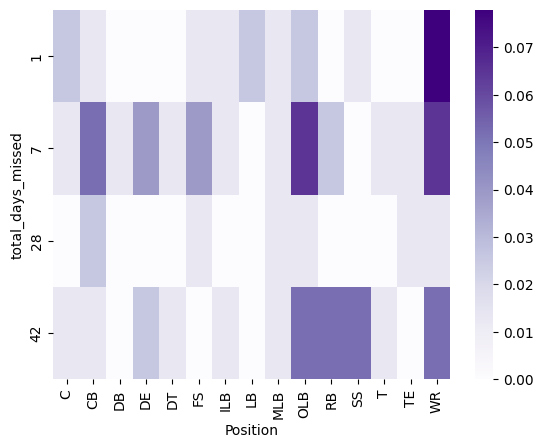

In [ ]:
sns.heatmap( pd.crosstab(injury_plays['total_days_missed'], injury_plays['Position'],normalize=True), cmap='Purples')

This visualization shows the frequency of days missed based on the position. We can see that WR tend to have the most severe injuries.

Based on the above visualizations, we can see that there are some trends in our data such as higher injury counts for some positions and more severe injuries in certain weather conditions. The trends do not appear to be strong, so we are expecting that while these four variables may help us predict injury types and severities, our accuracy will not be very high.

# Model

We plan to use conditions such as player position, weather, play type, and field type to determine the type and severity of an injury. We will use K-nearest neighbors classification on the below dataset for this model. We will also compare the KNN results to a logistic regression model.

In [11]:
import warnings
warnings.filterwarnings('ignore')
injury_plays = injury_plays.dropna()
injury_plays["string_days_missed"] = injury_plays["total_days_missed"].astype(str)
injury_plays

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,RosterPosition,...,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup,total_days_missed,string_days_missed
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1,Linebacker,...,Indoors,Synthetic,84.0,Cloudy,Punt,32.0,OLB,LB,42,42
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0,Linebacker,...,Open,Natural,76.0,Partly Cloudy,Punt,26.0,OLB,LB,7,7
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1,Safety,...,Outdoor,Synthetic,63.0,Clear,Pass,70.0,SS,DB,42,42
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0,Linebacker,...,Outdoor,Natural,80.0,Cloudy,Punt,30.0,LB,LB,1,1
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1,Wide Receiver,...,Retractable Roof,Synthetic,89.0,Partly Cloudy,Kickoff,69.0,WR,WR,42,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,42418,42418-19,42418-19-15,Ankle,Synthetic,1,0,0,0,Offensive Lineman,...,Retr. Roof - Closed,Synthetic,57.0,Partly Cloudy,Rush,15.0,C,OL,1,1
91,46394,46394-18,46394-18-3,Knee,Synthetic,1,1,0,0,Tight End,...,Outdoor,Synthetic,45.0,Cloudy,Kickoff Returned,3.0,TE,TE,7,7
92,45187,45187-9,45187-9-4,Ankle,Natural,1,0,0,0,Wide Receiver,...,Outdoor,Natural,81.0,Cloudy,Rush,4.0,WR,WR,1,1
93,42448,42448-14,42448-14-3,Knee,Synthetic,1,1,1,0,Wide Receiver,...,Retractable Roof,Synthetic,78.0,Partly Cloudy,Pass,3.0,WR,WR,28,28


For our KNN classification models we will define our training data and select the number of neighbors and cross validation folds to maximize our accuracy. For our logistic regression models we will also try to select the number of cross validation folds that maximizes our accuracy.

In [13]:
# KNN to predict body part
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score, precision_score
from sklearn.pipeline import Pipeline

# define the training data
X_train = injury_plays[["Weather", "Position", "PlayType", "FieldType"]].to_dict(orient="records")
y_train = injury_plays["BodyPart"]

#need to do dummy data here
vec = DictVectorizer(sparse=False)
vec.fit(X_train)
X_train = vec.transform(X_train)


# standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

# fit the k-nearest neighbors model
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train_sc, y_train)

pipeline = Pipeline([
    ("scaler", scaler),
    ("model", model)
])
cross_val_score(pipeline, X_train, y_train,
                cv=3, scoring="accuracy").mean()

0.5396825396825397

When using a KNN classification model to predict body part based on weather, position, play type, and field type, the accuracy is about 0.54.

In [14]:
# logistic regression to predict body part
from sklearn.linear_model import LogisticRegression

# define the training data
X_train = injury_plays[["Weather", "Position", "PlayType", "FieldType"]].to_dict(orient="records")
y_train = injury_plays["BodyPart"]

#need to do dummy data here
vec = DictVectorizer(sparse=False)
vec.fit(X_train)
X_train = vec.transform(X_train)


# standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

# fit a logistic regression model
model = LogisticRegression()
model.fit(X_train_sc, y_train)
pipeline = Pipeline([
    ("scaler", scaler),
    ("model", model)
])
cross_val_score(pipeline, X_train, y_train,
                cv=3, scoring="accuracy").mean()

0.5396825396825397

When using a logisitic regression model to predict body part based on weather, position, play type, and field type, the accuracy is about 0.54. This is the same accuracy as the KNN model.

In [15]:
# KNN for days missed
# define the training data
X_train = injury_plays[["Weather", "Position", "PlayType", "FieldType"]].to_dict(orient="records")
y_train = injury_plays["string_days_missed"]

#need to do dummy data here
vec = DictVectorizer(sparse=False)
vec.fit(X_train)
X_train = vec.transform(X_train)


# standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

# fit the k-nearest neighbors model, using classifier because string_days_missed is an object
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train_sc, y_train)
pipeline = Pipeline([
    ("scaler", scaler),
    ("model", model)
])
cross_val_score(pipeline, X_train, y_train,
                cv=5, scoring="accuracy").mean()

0.43076923076923085

When using a KNN classification model to predict days missed based on weather, position, play type, and field type, the accuracy is about 0.43.

In [16]:
# logistic regression for days missed

# define the training data
X_train = injury_plays[["Weather", "Position", "PlayType", "FieldType"]].to_dict(orient="records")
y_train = injury_plays["string_days_missed"]

#need to do dummy data here
vec = DictVectorizer(sparse=False)
vec.fit(X_train)
X_train = vec.transform(X_train)


# standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

# fit a logistic model
model = LogisticRegression()
model.fit(X_train_sc, y_train)
pipeline = Pipeline([
    ("scaler", scaler),
    ("model", model)
])
cross_val_score(pipeline, X_train, y_train,
                cv=8, scoring="accuracy").mean()

0.4419642857142857

When using a logistic regression model to predict days missed based on weather, position, play type, and field type, the accuracy is about 0.44. This is approximately the same accuracy as the KNN model, but slightly higher.

# Conclusions

In conclusion, there is some correlaton between position, play type, weather, and field type with body part and severity but there is not enough of a correlation to consistently predict these traits. Our KNN and logistic regression models had almost identical accuracies. This leads us to the conclusion that NFL injuries are somewhat random, which makes them difficult to predict and prevent.

In future studies, we would be interested to see if it is possible to predict whether or not an injury occurs given the above variables and other factors related to a player's health and physical condition.

In [18]:
# convert notebook to html file, must first download this notebook and add it to the content folder
%%shell
jupyter nbconvert --to html /content/KailenElla.ipynb

[NbConvertApp] Converting notebook /content/KailenElla.ipynb to html
[NbConvertApp] Writing 1084207 bytes to /content/KailenElla.html
